# Importing required Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
import pandas as pd

df=pd.read_csv('Space_Server_Dataset.csv')
df=pd.DataFrame(df)
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

The target variable is class. And it has 3 unique values.

In [4]:
df.shape

(10000, 18)

In [5]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

In [ ]:
df.columns

Feature Description:

objid = Object Identifier

ra = J2000 Right Ascension (r-band)

dec = J2000 Declination (r-band)

u = better of DeV/Exp magnitude fit

g = better of DeV/Exp magnitude fit

r = better of DeV/Exp magnitude fit

i = better of DeV/Exp magnitude fit

z = better of DeV/Exp magnitude fit

run = Run Number

rereun = Rerun Number

camcol = Camera column

field = Field number

specobjid = Object Identifier

class = object class (galaxy, star or quasar object)

redshift = Final Redshift

plate = plate number

mjd = MJD of observation

fiberid = fiber ID

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


# EDA Process

In [7]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


There is so much difference between 75% and max in specobjid, redshift, plate,fiberid. So Outliers might have present.

There are huge difference between mean and median in dec,run, specobjid,redshift and plate. So there is so much skewness in the datas.

rerun has Standard Deviation of 0.0. It has same value of 301 in the entire dataset.

# Checking Null Values

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df.isnull()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


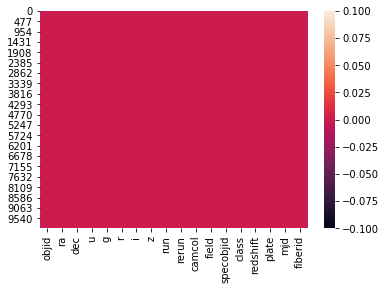

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

The Dataset has no null values.

# Univariate Analysis

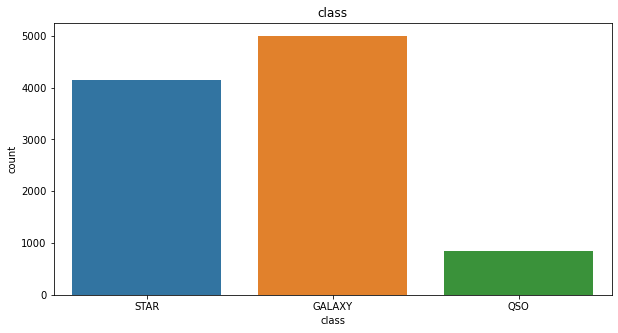

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64


In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x='class',data=df)
plt.title('class')
plt.show()
print(df['class'].value_counts())

Observation:

The Dataset information mostly contains datas that relates to Galaxies and Stars.

# Bivariate Analysis

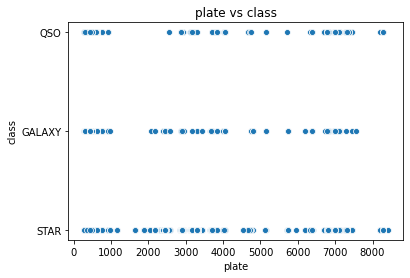

In [13]:
sns.scatterplot(x=df['plate'],y=df['class'],data=df)
plt.title('plate vs class')
plt.show()

Observation:

All Plate observations may derive the object as a star. But in Galaxy and Quasar the plate observations depends on certain values.

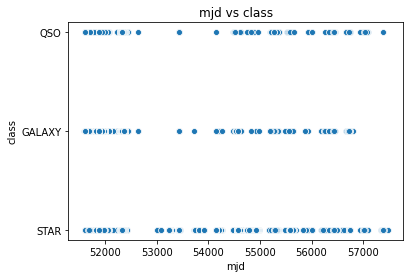

In [14]:
sns.scatterplot(x=df['mjd'],y=df['class'],data=df)
plt.title('mjd vs class')
plt.show()

Observation:

As in plate vs class here also, all Plate observations may derive the object as a star. But in Galaxy and Quasar the plate observations depends on certain values.

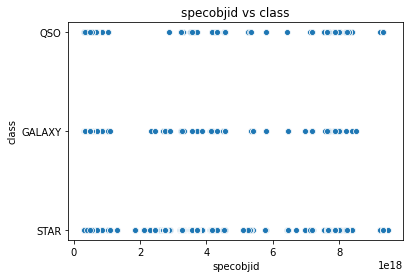

In [15]:
sns.scatterplot(x=df['specobjid'],y=df['class'],data=df)
plt.title('specobjid vs class')
plt.show()

Observation:

All the observations of specobjid are distributed in class feature.

# Label Encoding

Converting all string values to numeric.

In [16]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

list1=['class']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [18]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0,0.014019,447,51877,229


After Label Encoding:
    
0 -> Galaxy

1 -> Quasar

2 -> Star

# Multivariate Analysis

# Correlation

In [19]:
dfcorr=df.corr()
dfcorr

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
objid,1.000000e+00,2.524419e-14,-1.937483e-15,5.581214e-14,1.001149e-13,2.995673e-14,2.212198e-14,-4.107700e-14,-1.553011e-14,NaN,1.921887e-15,5.938881e-16,-1.829075e-15,-3.355500e-15,5.085882e-16,4.156934e-16,-3.317582e-15,4.665195e-15
ra,2.524419e-14,1.000000e+00,3.596046e-03,3.123756e-02,4.390863e-02,4.710290e-02,4.573107e-02,4.294957e-02,-9.274056e-02,NaN,-6.293831e-03,5.946996e-01,-9.532711e-02,-4.321896e-02,3.030740e-02,-9.532933e-02,-8.688726e-02,5.748482e-02
dec,-1.937483e-15,3.596046e-03,1.000000e+00,3.527932e-02,6.187471e-02,6.340395e-02,5.829189e-02,5.687030e-02,7.783849e-01,NaN,1.146139e-01,-1.314714e-01,8.834533e-02,-5.891815e-02,6.702076e-02,8.834153e-02,6.614663e-02,1.550124e-01
u,5.581214e-14,3.123756e-02,3.527932e-02,1.000000e+00,8.492320e-01,6.923790e-01,6.026302e-01,5.514828e-01,3.822910e-02,NaN,9.944672e-03,8.547880e-03,-1.294293e-01,-2.690437e-01,1.637409e-01,-1.294304e-01,-1.687927e-01,1.130112e-02
g,1.001149e-13,4.390863e-02,6.187471e-02,8.492320e-01,1.000000e+00,9.581062e-01,9.074187e-01,8.796222e-01,5.844630e-02,NaN,1.022304e-02,1.465110e-02,-5.497908e-02,-9.921163e-02,4.075763e-01,-5.498078e-02,-9.277155e-02,4.718739e-02
r,2.995673e-14,4.710290e-02,6.340395e-02,6.923790e-01,9.581062e-01,1.000000e+00,9.776718e-01,9.691967e-01,5.726060e-02,NaN,1.074725e-02,1.713294e-02,1.978831e-02,4.962769e-02,4.410797e-01,1.978671e-02,-9.344506e-03,6.108141e-02
i,2.212198e-14,4.573107e-02,5.829189e-02,6.026302e-01,9.074187e-01,9.776718e-01,1.000000e+00,9.815066e-01,4.976478e-02,NaN,1.346079e-02,1.978147e-02,7.295994e-02,1.467908e-01,4.314500e-01,7.295843e-02,5.089616e-02,6.997739e-02
z,-4.107700e-14,4.294957e-02,5.687030e-02,5.514828e-01,8.796222e-01,9.691967e-01,9.815066e-01,1.000000e+00,4.825225e-02,NaN,1.092981e-02,1.824845e-02,1.123981e-01,2.157584e-01,4.240342e-01,1.123969e-01,9.565845e-02,6.797999e-02
run,-1.553011e-14,-9.274056e-02,7.783849e-01,3.822910e-02,5.844630e-02,5.726060e-02,4.976478e-02,4.825225e-02,1.000000e+00,NaN,1.518143e-01,-4.638975e-01,9.360436e-02,-7.816172e-02,5.905595e-02,9.360107e-02,7.035433e-02,1.385659e-01
rerun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


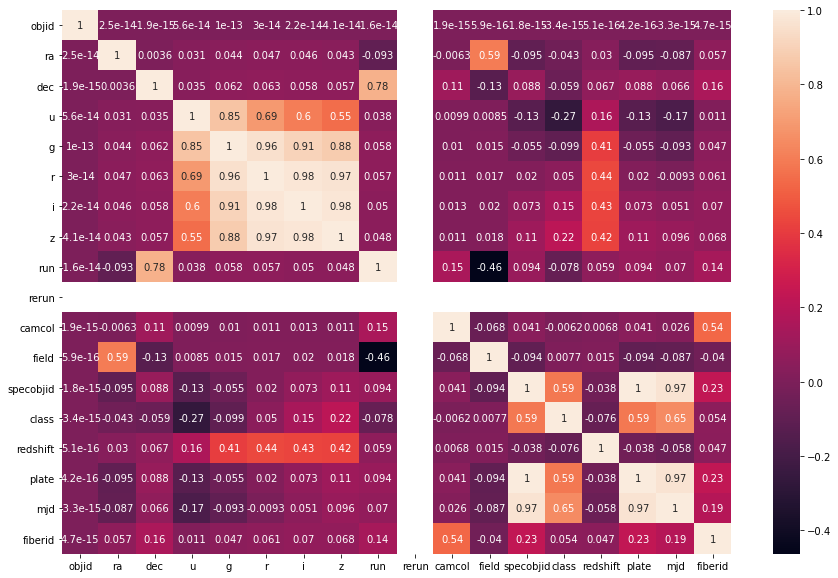

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(dfcorr,annot=True)

objid is just an ID. It can be dropped.

rerun has one unique value for the entire dataset. It will be dropped.

class is strongly correlated with specobjid,plate and mjd. Also with i,z and negatively correlated with u.

In [21]:
df.drop(['objid','rerun'],axis=1,inplace=True)
df

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


# Checking Outliers

In [22]:
df.shape

(10000, 16)

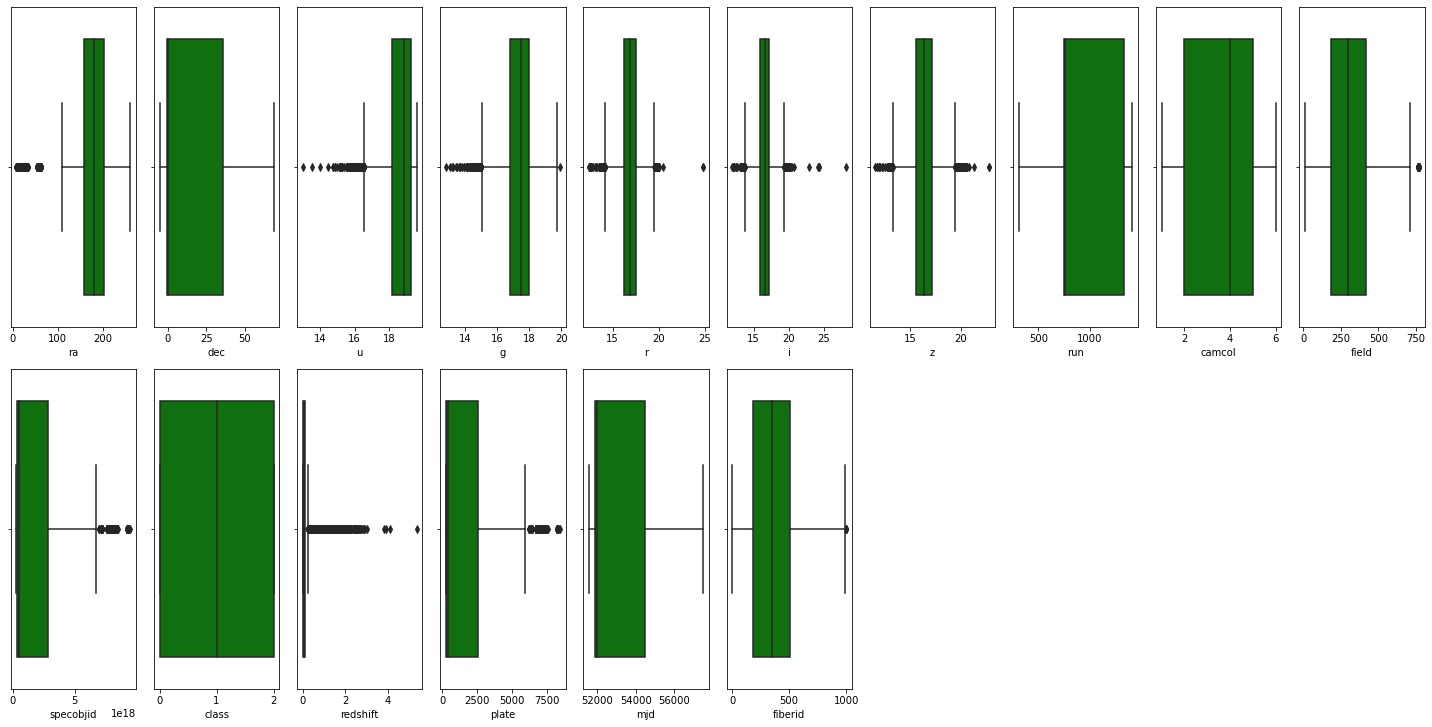

In [23]:
collist=df.columns.values
ncol=10
nrows=10

plt.figure(figsize=(2*ncol,5*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

There is so many outliers in redshift, u,g and some outliers in ra,r,i,z,specobjid and plate.

# Removal of Outliers

Z Score Method

In [24]:
import scipy
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

new_df

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


In [25]:
df.shape

(10000, 16)

In [26]:
new_df.shape

(8698, 16)

Percentage loss in data while removing outliers

In [27]:
P=(10000-8698)*100/10000
P

13.02

13.02% is huge for removing outliers from dataset.So Outliers wont be removed.

# Checking Skewness

In [28]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.169292
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

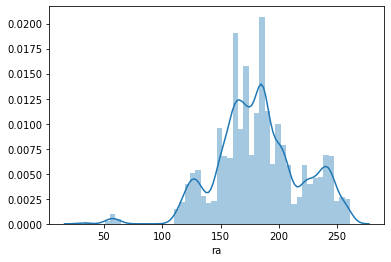

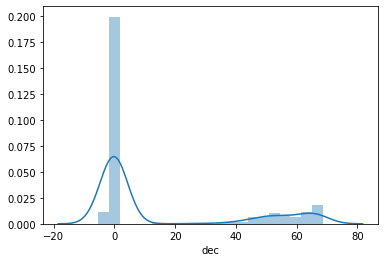

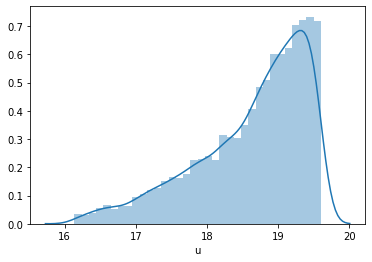

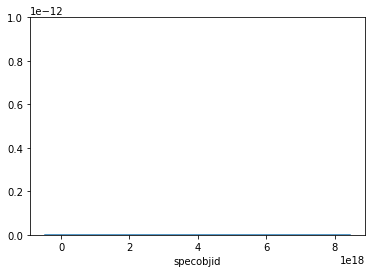

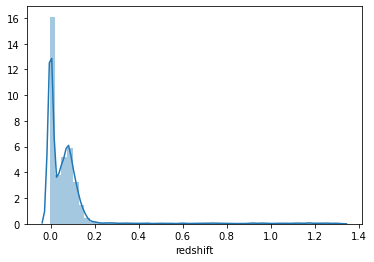

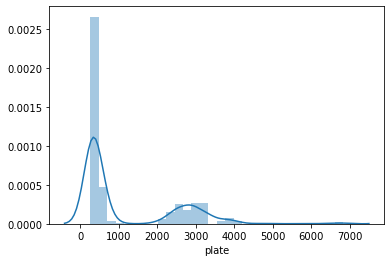

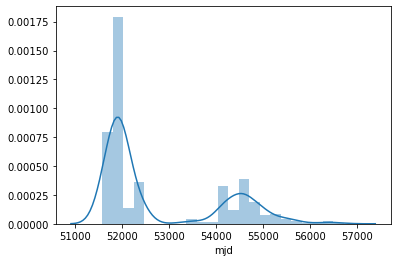

In [29]:
list2=['ra','dec','u','specobjid','redshift','plate','mjd']
for l in list2:
    sns.distplot(new_df[l])
    plt.show()

There are so much skewness in dec,u,specobjid,redshift,plate,mjd.

But there is no need to remove bcz the model accuracy decreases after applying transformation for removal of skewness.

# Preparing Input and Target Variables for Model Training

In [30]:
x=new_df.drop(['class'],axis=1)
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,131.398915,51.533706,17.79613,16.02621,15.15955,14.71488,14.33840,1345,3,161,5.033460e+17,0.055515,447,51877,249
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


In [31]:
y=pd.DataFrame(new_df['class'])
y

,class
0,2
1,2
2,0
3,2
4,2
...,...
9993,0
9995,0
9996,0
9998,0


# Scaling the Input Data

In [32]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)
scaled_x

array([[ 0.02256312, -0.56320666,  1.07641039, ...,  1.63757141,
         1.66737566,  0.75499423],
       [ 0.02442123, -0.56141479,  0.03976563, ..., -0.65934688,
        -0.883708  ,  1.0168139 ],
       [ 0.0266893 , -0.56177243,  0.96002649, ..., -0.68706698,
        -0.56896893,  0.87019489],
       ...,
       [-1.42483409,  1.46407362, -0.45890387, ..., -0.56386654,
        -0.68159614, -0.62217719],
       [-1.42009301,  1.46728569,  0.32097561, ..., -0.56386654,
        -0.68159614, -0.6169408 ],
       [-1.41488653,  1.46933883,  0.82314634, ..., -0.56386654,
        -0.68159614, -0.59599523]])

# The Target Variable is Classification Type. So the Model will be a Classifier.

# Finding Best Random State

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
best_r_state=0
accu=0

for i in range(30,200):
    train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(train_x,train_y)
    pred_y=mod.predict(test_x)
    tempaccu=r2_score(test_y,pred_y)
    if tempaccu>accu:
        accu=tempaccu
        best_r_state=i

print(f"Best random_state {best_r_state}")

Best random_state 151


# Multiple Algorithms

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.30,random_state=151)
modelclf=[LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),
          RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]

for mc in modelclf:
    mc.fit(train_x,train_y)
    mc_y=mc.predict(test_x)
    print("Accuracy Score of",mc,"is",accuracy_score(test_y,mc_y))
    print("Confusion Matrix\n",confusion_matrix(test_y,mc_y))
    print("Classification Report\n", classification_report(test_y,mc_y))
    print("*******************************************************************")
    print("\n\n")

Accuracy Score of LogisticRegression() is 0.9869731800766284
Confusion Matrix
 [[1401    5   14]
 [  13  123    0]
 [   1    1 1052]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1420
           1       0.95      0.90      0.93       136
           2       0.99      1.00      0.99      1054

    accuracy                           0.99      2610
   macro avg       0.98      0.96      0.97      2610
weighted avg       0.99      0.99      0.99      2610

*******************************************************************



Accuracy Score of KNeighborsClassifier() is 0.9103448275862069
Confusion Matrix
 [[1348    6   66]
 [  24  110    2]
 [ 136    0  918]]
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1420
           1       0.95      0.81      0.87       136
           2       0.93      0.87      0.90      1054

    accuracy  

The RandomForestClassifier() has highest accuracy of 98.89%.

# GridSearchCV

Hypertuning SVC using GridSearchCV.

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
parameters={'kernel':['linear','rbf','poly'],'C':[1,10]}
clf=GridSearchCV(svc,parameters)
clf.fit(scaled_x,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['linear', 'rbf', 'poly']})

In [36]:
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


These are the parameters that will be fed to SVR to create a best model.

# Support Vector Machine

In [41]:
svc=SVC(kernel='linear',C=10,probability=True) #parameters given from GridSearchCV method.
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
svc_y=svc.predict(test_x)

print("Accuracy Score of SVC is",accuracy_score(test_y,svc_y))
print("Confusion Matrix\n",confusion_matrix(test_y,svc_y))
print("Classification Report\n", classification_report(test_y,svc_y))

Accuracy Score of SVC is 0.9919540229885058
Confusion Matrix
 [[1409    6    5]
 [  10  126    0]
 [   0    0 1054]]
Classification Report
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1420
           1       0.95      0.93      0.94       136
           2       1.00      1.00      1.00      1054

    accuracy                           0.99      2610
   macro avg       0.98      0.97      0.98      2610
weighted avg       0.99      0.99      0.99      2610



After Hypertuning SVC model accuracy increased to 99.19% from 97.35%. Thus it became the model having highest accuracy.

# CROSS VALIDATION

In [38]:
from sklearn.model_selection import cross_val_score
for m in modelclf:
    mscores=cross_val_score(m,scaled_x,y,cv=5)
    print("Scores of",m,"is",mscores)
    print("Mean Score of",m,"is",mscores.mean(),"\nStandard Deviation is",mscores.std())
    print("****************************************************************************\n\n")

Scores of LogisticRegression() is [0.9816092  0.98678161 0.98275862 0.97757332 0.98389879]
Mean Score of LogisticRegression() is 0.9825243071391274 
Standard Deviation is 0.0030139162680681876
****************************************************************************


Scores of KNeighborsClassifier() is [0.91666667 0.91609195 0.90287356 0.88326624 0.91029327]
Mean Score of KNeighborsClassifier() is 0.9058383401743637 
Standard Deviation is 0.012333086016870986
****************************************************************************


Scores of DecisionTreeClassifier() is [0.98563218 0.98333333 0.98965517 0.9746981  0.98562392]
Mean Score of DecisionTreeClassifier() is 0.9837885427613967 
Standard Deviation is 0.004980527978172372
****************************************************************************


Scores of SVC() is [0.96896552 0.97068966 0.96896552 0.96434733 0.9706728 ]
Mean Score of SVC() is 0.9687281632329322 
Standard Deviation is 0.0023209253694370575
***********

In cross validation the best model is GradientBoostingClassifier() having accuracy of 98.82%.

In all algorithms except AdaBoostClassifier() the accuracy score lies above 95% by cross validation.

# Conclusion

SVC has the highest Accuracy of 99.19%.

So this is the best model.

# AUC_ROC Curve

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [42]:
y_pred_prob=svc.predict_proba(test_x)
y_pred_prob

array([[9.99661614e-01, 2.91630847e-04, 4.67550109e-05],
       [9.95901728e-01, 3.53257741e-03, 5.65694554e-04],
       [9.10398421e-03, 2.29960405e-03, 9.88596412e-01],
       ...,
       [1.28760211e-02, 2.15949342e-03, 9.84964485e-01],
       [9.31369918e-01, 6.45407604e-02, 4.08932170e-03],
       [9.99960214e-01, 3.85666664e-05, 1.21895899e-06]])

In [43]:
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, y_pred_prob[:,i], pos_label=i)

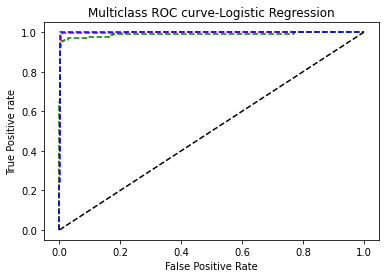

In [44]:
plt.plot(fpr[0], tpr[0], linestyle='--',color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve-Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.plot([0,1],[0,1],'k--')
plt.show()

AUC_ROC curve is covering good amount of Area

# Saving the Model

In [45]:
import pickle

filename='Space_Server_svc.pkl'
pickle.dump(svc,open(filename,'wb'))

loaded_model=pickle.load(open(filename,'rb'))

loaded_model.predict(test_x)

array([0, 0, 2, ..., 2, 0, 0])